In [302]:
import pandas as pd
import timeit
import json
import numpy as np
import matplotlib.pyplot as plt

## Gathering the data

#### 1. Reading twitter archive from the csv provided

In [436]:
twitter_archive =pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


#### 2. Reading the data through twitter API

In [3]:
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [9]:
# Fetching list of tweets

start = timeit.timeit()
my_list = twitter_archive.tweet_id
list_of_tweets = []
cant_find_tweet_ids = []
for each_id in my_list:
    try:
        list_of_tweets.append(api.get_status(each_id))
        print(each_id)
    except Exception as e:
        cant_find_tweet_ids.append(each_id)
        print(str(each_id) + ' ' + "not found")
end = timeit.timeit()
print(end - start)

892420643555336193
892177421306343426
891815181378084864
891689557279858688
891327558926688256
891087950875897856
890971913173991426
890729181411237888
890609185150312448
890240255349198849
890006608113172480
889880896479866881
889665388333682689
889638837579907072
889531135344209921
889278841981685760
888917238123831296
888804989199671297
888554962724278272
888202515573088257 not found
888078434458587136
887705289381826560
887517139158093824
887473957103951883
887343217045368832
887101392804085760
886983233522544640
886736880519319552
886680336477933568
886366144734445568
886267009285017600
886258384151887873
886054160059072513
885984800019947520
885528943205470208
885518971528720385
885311592912609280
885167619883638784
884925521741709313
884876753390489601
884562892145688576
884441805382717440
884247878851493888
884162670584377345
883838122936631299
883482846933004288
883360690899218434
883117836046086144
882992080364220416
882762694511734784
882627270321602560
882268110199369728
88

821765923262631936
821522889702862852
821421320206483457
821407182352777218
821153421864615936
821149554670182400
821107785811234820
821044531881721856
820837357901512704
820749716845686786
820690176645140481
820494788566847489
820446719150292993
820314633777061888
820078625395449857
820013781606658049
819952236453363712
819924195358416896
819711362133872643
819588359383371776
819347104292290561
819238181065359361
819227688460238848
819015337530290176
819015331746349057
819006400881917954
819004803107983360
818646164899774465
818627210458333184
818614493328580609
818588835076603904
818536468981415936
818307523543449600
818259473185828864
818145370475810820
817908911860748288
817827839487737858
817777686764523521
817536400337801217
817502432452313088
817423860136083457
817415592588222464
817181837579653120
817171292965273600
817120970343411712
817056546584727552
816829038950027264
816816676327063552
816697700272001025
816450570814898180
816336735214911488
816091915477250048
816062466425

765395769549590528
765371061932261376
765222098633691136
764857477905154048
764259802650378240
763956972077010945
763837565564780549
763183847194451968
763167063695355904
763103485927849985
762699858130116608
762471784394268675
762464539388485633
762316489655476224
762035686371364864
761976711479193600
761750502866649088
761745352076779520
761672994376806400
761599872357261312
761371037149827077
761334018830917632
761292947749015552
761227390836215808
761004547850530816
760893934457552897
760656994973933572
760641137271070720
760539183865880579
760521673607086080
760290219849637889
760252756032651264
760190180481531904
760153949710192640
759943073749200896
759923798737051648
759846353224826880
759793422261743616
759566828574212096 not found
759557299618865152
759447681597108224
759446261539934208
759197388317847553
759159934323924993
759099523532779520
759047813560868866
758854675097526272


Rate limit reached. Sleeping for: 680


758828659922702336
758740312047005698
758474966123810816
758467244762497024
758405701903519748
758355060040593408
758099635764359168
758041019896193024
757741869644341248
757729163776290825
757725642876129280
757611664640446465
757597904299253760 not found
757596066325864448
757400162377592832
757393109802180609
757354760399941633
756998049151549440
756939218950160384
756651752796094464
756526248105566208
756303284449767430
756288534030475264
756275833623502848
755955933503782912
755206590534418437
755110668769038337
754874841593970688
754856583969079297
754747087846248448
754482103782404096
754449512966619136
754120377874386944
754011816964026368 not found
753655901052166144
753420520834629632
753398408988139520
753375668877008896
753298634498793472
753294487569522689
753039830821511168
753026973505581056
752932432744185856
752917284578922496
752701944171524096
752682090207055872
752660715232722944
752568224206688256
752519690950500352
752334515931054080
752309394570878976
75217315293

705786532653883392
705591895322394625
705475953783398401
705442520700944385
705428427625635840
705239209544720384
705223444686888960
705102439679201280
705066031337840642
704871453724954624
704859558691414016
704847917308362754
704819833553219584
704761120771465216
704499785726889984
704491224099647488
704480331685040129
704364645503647744
704347321748819968
704134088924532736
704113298707505153
704054845121142784
703774238772166656
703769065844768768
703631701117943808
703611486317502464
703425003149250560
703407252292673536
703382836347330562
703356393781329922
703268521220972544
703079050210877440
703041949650034688
702932127499816960
702899151802126337
702684942141153280
702671118226825216
702598099714314240
702539513671897089
702332542343577600
702321140488925184
702276748847800320
702217446468493312
701981390485725185
701952816642965504
701889187134500865
701805642395348998
701601587219795968
701570477911896070
701545186879471618
701214700881756160
700890391244103680
700864154249

678675843183484930
678643457146150913
678446151570427904
678424312106393600
678410210315247616
678399652199309312
678396796259975168
678389028614488064
678380236862578688
678341075375947776
678334497360859136
678278586130948096
678255464182861824
678023323247357953
678021115718029313
677961670166224897
677918531514703872
677895101218201600
677716515794329600
677700003327029250
677698403548192770
677687604918272002
677673981332312066
677662372920729601
677644091929329666
677573743309385728
677565715327688705
677557565589463040
677547928504967168
677530072887205888
677335745548390400
677334615166730240
677331501395156992
677328882937298944
677314812125323265
677301033169788928
677269281705472000
677228873407442944


Rate limit reached. Sleeping for: 693


677187300187611136
676975532580409345
676957860086095872
676949632774234114
676948236477857792
676946864479084545
676942428000112642
676936541936185344
676916996760600576
676897532954456065
676864501615042560
676821958043033607
676819651066732545
676811746707918848
676776431406465024
676617503762681856
676613908052996102
676606785097199616
676603393314578432
676593408224403456
676590572941893632
676588346097852417
676582956622721024
676575501977128964
676533798876651520
676496375194980353
676470639084101634
676440007570247681
676430933382295552
676263575653122048
676237365392908289
676219687039057920
676215927814406144
676191832485810177
676146341966438401
676121918416756736
676101918813499392
676098748976615425
676089483918516224
675898130735476737
675891555769696257
675888385639251968
675878199931371520
675870721063669760
675853064436391936
675849018447167488
675845657354215424
675822767435051008
675820929667219457
675798442703122432
675781562965868544
675740360753160193
675710890956

668226093875376128
668221241640230912
668204964695683073
668190681446379520
668171859951755264
668154635664932864
668142349051129856
668113020489474048
667937095915278337
667924896115245057
667915453470232577
667911425562669056
667902449697558528
667886921285246976
667885044254572545
667878741721415682
667873844930215936
667866724293877760
667861340749471744
667832474953625600
667806454573760512
667801013445750784
667793409583771648
667782464991965184
667773195014021121
667766675769573376
667728196545200128
667724302356258817
667550904950915073
667550882905632768
667549055577362432
667546741521195010
667544320556335104
667538891197542400
667534815156183040
667530908589760512
667524857454854144
667517642048163840
667509364010450944
667502640335572993
667495797102141441
667491009379606528
667470559035432960
667455448082227200
667453023279554560
667443425659232256
667437278097252352
667435689202614272
667405339315146752
667393430834667520
667369227918143488
667211855547486208
667200525029

In [11]:
# Separating json part of tweets to a list

list_of_dict = []
for each_json_tweet in list_of_tweets:
    list_of_dict.append(each_json_tweet._json)

In [12]:
# writing above list to text file

with open('tweet_json.txt','w') as file:
    file.write(json.dumps(list_of_dict, indent = 4 ))

In [13]:
# creating dataframe from tweet_json.txt file

my_list = []
with open('tweet_json.txt',encoding='utf-8') as json_file:
    all_data = json.load(json_file)
    
    for each_dict in all_data:
        tweet_id = each_dict['id']
        tweet_text = each_dict['text']
        favorite_count = each_dict['favorite_count']
        retweet_count = each_dict['retweet_count']
        
        my_list.append({'tweet_id': str(tweet_id),
                       'favorite_count': int(favorite_count),
                       'retweet_count': int(retweet_count)})
        df_fav_retweet = pd.DataFrame(my_list , columns =['tweet_id','favorite_count','retweet_count'])

#### 3. Extracting data from tsv

In [445]:
import requests
import os

In [446]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [447]:
url_content = response.content
tsv_file = open('image-predictions.tsv', 'wb')
tsv_file.write(url_content)
tsv_file.close()

In [448]:
df_image = pd.read_csv('image-predictions.tsv', sep = '\t')

In [50]:
# configure pandas to display values without any truncation.
pd.set_option('display.max_colwidth', -1) 

<ipython-input-50-ceece3b2a0af>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Assessing the data

The three datasets we are going to assess are:

1. twitter_archive
2. df_image
3. df_fav_retweet

Visually and programmatically assessing them one by one

### Twitter_archive:



In [438]:
twitter_archive # for visual assessment

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [442]:
# programmatic assessment

twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [456]:
# checking if rating denominator is 0 that might cause divide by 0 error
twitter_archive[twitter_archive['rating_denominator']== 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [457]:
# unique names of dogs
twitter_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

### df_image:



In [449]:
df_image # for visual assessment

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [450]:
# programmatic assessment

df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [459]:
# checking if there are records wherein all 3 dog types determined by neural network are not valid dog type
df_image[(df_image['p1_dog']== False)&(df_image['p2_dog']== False)&(df_image['p3_dog']== False)]

# 324 such cases are present

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


### df_fav_retweet:



In [451]:
df_fav_retweet # for visual assessment

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34733,7279
1,892177421306343426,30113,5444
2,891815181378084864,22665,3585
3,891689557279858688,38002,7466
4,891327558926688256,36280,8029
...,...,...,...
2325,666049248165822465,92,37
2326,666044226329800704,255,120
2327,666033412701032449,105,38
2328,666029285002620928,117,41


In [453]:
# programmatic assessment

df_fav_retweet.info(),df_fav_retweet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2330 entries, 0 to 2329
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2330 non-null   object
 1   favorite_count  2330 non-null   int64 
 2   retweet_count   2330 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


(None,
        favorite_count  retweet_count
 count  2330.000000     2330.000000  
 mean   7259.342918     2564.123176  
 std    11272.141460    4336.002813  
 min    0.000000        1.000000     
 25%    1260.000000     520.000000   
 50%    3144.000000     1195.000000  
 75%    8868.000000     2972.500000  
 max    149233.000000   73471.000000 )

#### Quality

#### `twitter_archive` table
1. [tweet_id is in integar format, should be `string`](#one)
- [timestamp must be datetype not objects](#two)
- [Rating denominator is 0 for tweet_id = 835246439529840640, causing divide by 0 error](#three)
- [Two dogs for tweet_id = 747600769478692864 but single name provided in name field](#four)
- [Two dogs for tweet_id = 670755717859713024 but single name provided in name field](#five)
- [For tweet_id = 748692773788876800, Quizno is named as `his`](#six)
- [Retweets are present in the dataset](#seven)

##### Tidiness
8. [Doggo, pupper,puppo,flofer should be present in a column of instead for 4 in df_base](#eight)
- [Expanded_urls have 2 urls in a cell](#nine)

#### `df_image` table
10. [tweet_id is in integar format, should be `string`](#ten)
- [Image prediction not of dog breeds are present](#eleven)

##### Tidiness
12. [Dropping unnecessary columns from df_archive_image and saving it as df_archive_image_clean](#twelve) 

#### `df_fav_retweet` table

##### Tidiness
13. [df_fav_retweet to be merged with df_archive_image_clean and name it as twitter_archive_master](#thirteen)







## Cleaning the data

Before we start cleaning the datasets we need to make copies of original dataset and then we would be working on the datasets. This will keep original datasets intact of any changes


In [460]:
twitter_archive_original = twitter_archive.copy()
df_image_original = df_image.copy()
df_fav_retweet_original = df_fav_retweet.copy()


#### 1. tweet_id is in integar format, should be `string` in `twitter_archive` <a class ="anchor" id = "one"></a>
[top](#Quality)

##### Define
Apply map(str) function on tweet_id

#### Code

In [461]:
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].map(str)

#### Test

In [464]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### 2.timestamp must be datetype not objects <a class ="anchor" id = "two"></a>
[top](#Quality)

##### Define

Apply pd.to_datetime function and then dt.date


#### Code

In [181]:
twitter_archive['timestamp'] = pd.to_datetime(twitter_archive['timestamp'])
twitter_archive['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive['retweeted_status_timestamp'])
twitter_archive['tweet_date']= twitter_archive['timestamp'].dt.date
twitter_archive['tweet_date'] = pd.to_datetime(twitter_archive['tweet_date'], format = '%Y-%m-%d')
twitter_archive['retweet_date']= twitter_archive['retweeted_status_timestamp'].dt.date
twitter_archive['retweet_date'] = pd.to_datetime(twitter_archive['retweet_date'], format = '%Y-%m-%d')

#### Test

In [182]:
twitter_archive.timestamp.dtype , twitter_archive.retweeted_status_timestamp.dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

#### 3. Rating denominator is 0 for tweet_id = 835246439529840640, causing divide by 0 error <a class ="anchor" id = "three"></a>
[top](#Quality)

##### Define
Substituting the rating_denominator value to 10 from 0 using .loc function of pandas

#### Code

In [183]:
twitter_archive.loc[twitter_archive['tweet_id']== '835246439529840640','rating_denominator'] = 10

#### Test

In [184]:
twitter_archive[twitter_archive['tweet_id']== '835246439529840640']['rating_denominator']

313    10
Name: rating_denominator, dtype: int64

#### 4. Two dogs for tweet_id = 747600769478692864 but single name provided in name field <a class ="anchor" id = "four"></a>
[top](#Quality)

##### Define
For this particular tweet_id manually replacing `name` of dog using .loc function of pandas

#### Code

In [185]:
twitter_archive.loc[twitter_archive['tweet_id']== '747600769478692864','name'] = 'Bookstore & Seaweed'

#### Test

In [186]:
twitter_archive[twitter_archive['tweet_id']== '747600769478692864']['name']

1007    Bookstore & Seaweed
Name: name, dtype: object

#### 5. Two dogs for tweet_id = 670755717859713024 but single name provided in name field <a class ="anchor" id = "five"></a>
[top](#Quality)

##### Define
For this particular tweet_id manually replacing `name` of dog using .loc function of pandas

#### Code

In [187]:
twitter_archive.loc[twitter_archive['tweet_id']== '670755717859713024','name']= 'Gin & Amp'

#### Test

In [188]:
twitter_archive[twitter_archive['tweet_id']== '670755717859713024']['name']

2096    Gin & Amp
Name: name, dtype: object

#### 6. For tweet_id = 748692773788876800, Quizno is named as `his` <a class ="anchor" id = "six"></a>
[top](#Quality)

##### Define
For this particular tweet_id manually replacing `name` of dog using .loc function of pandas

#### Code

In [189]:
twitter_archive.loc[twitter_archive['tweet_id']== '748692773788876800','name']= 'Quizno'

#### Test

In [190]:
twitter_archive.loc[twitter_archive['tweet_id']== '748692773788876800','name'] 

992    Quizno
Name: name, dtype: object

#### 7. Retweets are present in the dataset <a class ="anchor" id = "seven"></a>
[top](#Quality)

##### Define

Take out the index of rows where retweet_date is not null.Drop them using .drop() function and do inplace = True to made amendments in the existing table itself.


#### Code

In [191]:
twitter_archive_clean = twitter_archive.drop(twitter_archive[twitter_archive['retweet_date'].\
                                                             isnull() == False].index ,
                                             inplace = True)
twitter_archive_clean = twitter_archive

#### Test

In [192]:
twitter_archive_clean[twitter_archive_clean['retweet_date'].isnull() == False]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,tweet_date,retweet_date


#### 8. twitter_archive : Doggo, pupper,puppo,flofer should be present in a column of instead for 4 in df_base <a class ="anchor" id = "eight"></a>
[top](#Quality)

##### Define
1. Set the None values to np.nan in all the 4 dog stage columns.
2. Using text.str.extract, extract non - NaN values across 4 columns(doggo|floofer|pupper|puppo) and store them as dog_stages
3. Drop doggo|floofer|pupper|puppo columns

#### Code

In [193]:
# Change string from none to NaN in df_archive_image
twitter_archive_clean['doggo'] = twitter_archive_clean['doggo'].replace('None', np.NaN)
twitter_archive_clean['floofer'] = twitter_archive_clean['floofer'].replace('None', np.NaN)
twitter_archive_clean['pupper'] = twitter_archive_clean['pupper'].replace('None', np.NaN)
twitter_archive_clean['puppo'] = twitter_archive_clean['puppo'].replace('None', np.NaN)
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

In [194]:
twitter_archive_clean['dog_stages'] = twitter_archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', \
                                                                             expand = True)

twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [195]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

#### 9.  df_archive_image: few expanded_urls have multiple urls in one cell <a class ="anchor" id = "nine"></a>
[top](#Quality)


##### Define
We will split the expanded_urls column with comma has delimiter using pd.concat
Take the first url split part and rename it to url_mofified
Merge the modified url dataframe with df_archive_image and name it as df_archive_image_clean
drop the original expanded_urls column from the dataframe

#### Code

In [263]:
url = pd.concat([df_archive_image['tweet_id'],df_archive_image['expanded_urls'].str.split(',',expand = True)]
                ,axis =1 )
url_clean = url[['tweet_id',0]]
url_clean.rename(columns = {0: 'urls_modified'}, inplace = True)
df_archive_image_clean = df_archive_image.merge(url_clean , on = 'tweet_id', how = 'left')
df_archive_image_clean.drop(columns = 'expanded_urls', inplace = True)



#### Test

In [262]:
df_archive_image_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2048 non-null   object        
 1   text                2048 non-null   object        
 2   rating_numerator    2048 non-null   int64         
 3   rating_denominator  2048 non-null   int64         
 4   name                2048 non-null   object        
 5   tweet_date          2048 non-null   datetime64[ns]
 6   dog_stages          342 non-null    object        
 7   jpg_url             1867 non-null   object        
 8   img_num             1867 non-null   float64       
 9   p1                  1867 non-null   object        
 10  p1_conf             1867 non-null   float64       
 11  p1_dog              1867 non-null   object        
 12  p2                  1867 non-null   object        
 13  p2_conf             1867 non-null   float64     

#### 10.  In `df_image` - tweet_id is in integar format, should be `string`  <a class ="anchor" id = "ten"></a>
[top](#Quality)

##### Define
Convert tweet_id in df_image to string using pandas .map(str) function

#### Code

In [104]:
df_image['tweet_id'] = df_image['tweet_id'].map(str)

#### Test

In [111]:
df_image.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### 11. df_image : Image prediction not of dog breeds are present. <a class ="anchor" id = "eleven"></a>
[top](#Quality)

##### Define
For the records where p1_dog,p2_dog & p3_dog are `False` and the name corresponding to them twitter_archive is `None`, we can drop those tweet_ids in all dataframes. If we have a name of dog present but it is not properly decoded using neural network image processing,we will keep those records.And from here we can have a common dataframe for twitter_archive and df_image called df_archive_image.

#### Code

In [196]:
# Join twitter_archive with df_image using twitter_id as key

df_archive_image = twitter_archive_clean.merge(df_image, on = 'tweet_id', how = 'left')

In [197]:
df_archive_image.drop(df_archive_image[(df_archive_image['p1_dog']== False)&(df_archive_image['p2_dog']== False)\
              &(df_archive_image['p3_dog']== False) & (df_archive_image['name']== 'None')].index , inplace = True)

#### Test

In [198]:
df_archive_image[(df_archive_image['p1_dog']== False)&(df_archive_image['p2_dog']== False)\
              &(df_archive_image['p3_dog']== False) & (df_archive_image['name']== 'None')]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### 12. Dropping unnecessary columns from df_archive_image and saving it as df_archive_image_clean <a class ="anchor" id = "twelve"></a>
[top](#Quality)


##### Define
Columns to be dropped - in_reply_to_status_id, in_reply_to_user_id, source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, retweet_date, timestamp

#### Code

In [199]:
df_archive_image = df_archive_image.drop(['in_reply_to_status_id','in_reply_to_user_id','source','retweeted_status_id',\
                       'retweeted_status_user_id','retweeted_status_timestamp','retweet_date','timestamp'], axis = 1)

#### Test

In [200]:
df_archive_image.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2174
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2048 non-null   object        
 1   text                2048 non-null   object        
 2   expanded_urls       1990 non-null   object        
 3   rating_numerator    2048 non-null   int64         
 4   rating_denominator  2048 non-null   int64         
 5   name                2048 non-null   object        
 6   tweet_date          2048 non-null   datetime64[ns]
 7   dog_stages          342 non-null    object        
 8   jpg_url             1867 non-null   object        
 9   img_num             1867 non-null   float64       
 10  p1                  1867 non-null   object        
 11  p1_conf             1867 non-null   float64       
 12  p1_dog              1867 non-null   object        
 13  p2                  1867 non-null   object      

#### 13.Merge df_archive_image_clean with df_fav_retweet and name it as twitter_archive_master. <a class ="anchor" id = "thirteen"></a>
[top](#Quality)

#### Code

In [265]:
twitter_archive_master= df_archive_image_clean.merge(df_fav_retweet, on = 'tweet_id', how = 'left')

#### Test

In [266]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2048 non-null   object        
 1   text                2048 non-null   object        
 2   rating_numerator    2048 non-null   int64         
 3   rating_denominator  2048 non-null   int64         
 4   name                2048 non-null   object        
 5   tweet_date          2048 non-null   datetime64[ns]
 6   dog_stages          342 non-null    object        
 7   jpg_url             1867 non-null   object        
 8   img_num             1867 non-null   float64       
 9   p1                  1867 non-null   object        
 10  p1_conf             1867 non-null   float64       
 11  p1_dog              1867 non-null   object        
 12  p2                  1867 non-null   object        
 13  p2_conf             1867 non-null   float64     

#### 10.  twitter_archive_master: type of dog as determined by neural networks <a class ="anchor" id = "fourteen"></a>


##### Define
1.Define a function dog_type
2.If p1_conf is greater than both p2_conf & p3_conf and p1_dog is True : Get p1
3.If p1_conf is greater than both p2_conf & p3_conf and p2_dog is True : Get p2
4.If p1_conf is greater than both p2_conf & p3_conf and p3_dog is True : Get p3
Else none
 
Then apply above def to twitter_archive_master to get the desired fiels 'dog_type'
Then drop the redundant columns related to type of dog


#### Code

In [285]:
def dog_type(df):
    if ((df['p1_conf'] >= df['p2_conf'])& (df['p1_conf'] >= df['p3_conf'])&(df['p1_dog'] == True)):
        return df['p1']
    elif((df['p1_conf'] >= df['p2_conf'])& (df['p1_conf'] >= df['p3_conf'])&(df['p2_dog'] == True)):
        return df['p2']
    elif((df['p1_conf'] >= df['p2_conf'])& (df['p1_conf'] >= df['p3_conf'])&(df['p3_dog'] == True)):
        return df['p3']
    else:
        return np.nan
        
twitter_archive_master['dog_type']  =  twitter_archive_master.apply(dog_type , axis = 1)    

# Drop the columns not required
twitter_archive_master.drop(columns = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], \
                           inplace = True)

#### Test

In [286]:
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2047
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2048 non-null   object        
 1   text                2048 non-null   object        
 2   rating_numerator    2048 non-null   int64         
 3   rating_denominator  2048 non-null   int64         
 4   name                2048 non-null   object        
 5   tweet_date          2048 non-null   datetime64[ns]
 6   dog_stages          342 non-null    object        
 7   jpg_url             1867 non-null   object        
 8   img_num             1867 non-null   float64       
 9   urls_modified       1990 non-null   object        
 10  favorite_count      2041 non-null   float64       
 11  retweet_count       2041 non-null   float64       
 12  dog_type            1686 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), obje

In [288]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index= False)


# Analysis & Visualization 

#### 1. Top 10 dog types having maximum tweets for them 

In [431]:
twitter_archive_master.groupby('dog_type')['tweet_id'].count().nlargest(10)

dog_type
golden_retriever      158
Labrador_retriever    108
Pembroke              95 
Chihuahua             91 
pug                   62 
toy_poodle            51 
chow                  48 
Pomeranian            42 
Samoyed               42 
malamute              33 
Name: tweet_id, dtype: int64

golden_retriever have received the maximum tweets, other 9 are present above

#### 2. Most sort after/ popular dog.
Dog with most average retweet_count

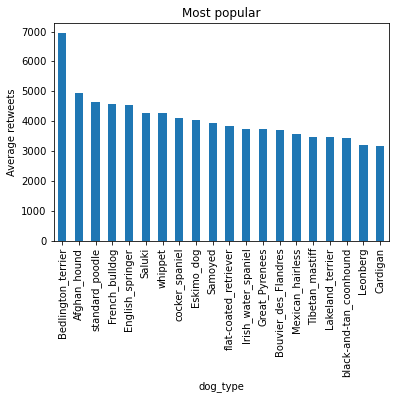

In [434]:
df = twitter_archive_master.groupby('dog_type')['retweet_count'].mean().nlargest(20)
ax = df.plot(kind = 'bar',title = 'Most popular')
ax.set_ylabel('Average retweets')
plt.show()

#### Bedlington terrier is the most sort after dog

#### 3.  Top 10 highest rated dogs

In [418]:
# Creating rating as numerator by denominator
twitter_archive_master['rating']= twitter_archive_master['rating_numerator']/\
twitter_archive_master['rating_denominator']

In [419]:
# Getting total number of tweets per dog_type also having a flag of greater or equal to 3
tweets_per_dog =twitter_archive_master.groupby('dog_type')['tweet_id'].count().\
reset_index(name = 'count_of_tweets')
tweets_per_dog['Greater_than_3'] = tweets_per_dog['count_of_tweets'] >= 3
tweets_per_dog

,dog_type,count_of_tweets,Greater_than_3
0,Afghan_hound,3,True
1,Airedale,12,True
2,American_Staffordshire_terrier,16,True
3,Appenzeller,2,False
4,Australian_terrier,2,False
...,...,...,...
108,toy_poodle,51,True
109,toy_terrier,3,True
110,vizsla,13,True
111,whippet,11,True


In [358]:
# merging rating dataset with count of tweets dataset
mean_rating_per_dog= twitter_archive_master.groupby('dog_type')['rating'].mean().reset_index\
(name = 'mean_rating_per_dog')
count_mean_per_dog= tweets_per_dog.merge(mean_rating_per_dog, on = 'dog_type', how = 'left')

In [375]:
# for number of tweets atleast 3 getiing the mean rating per dog type
count_mean_per_dog[count_mean_per_dog['Greater_than_3'] == True][['dog_type','count_of_tweets',\
                                                                 'mean_rating_per_dog']].\
sort_values('mean_rating_per_dog', ascending = False).head(10)

,dog_type,count_of_tweets,mean_rating_per_dog
54,Saluki,4,1.250000
50,Pomeranian,42,1.247619
78,briard,3,1.233333
63,Tibetan_mastiff,4,1.225000
9,Border_terrier,7,1.214286
26,Gordon_setter,4,1.175000
31,Irish_setter,4,1.175000
55,Samoyed,42,1.169048
89,golden_retriever,158,1.166752
94,kuvasz,18,1.161111


To get the mean rating for top 10 dog,I have not considered the dog_types having number of tweets for them less than 3.Else this may shown the baised picture of mean ratings.
After applying the filtering criteria of count of tweets of atleast 3,the top 10 highest rated dogs are as above shown

#### 4. High shareability index dogs 

In [404]:
tweets_per_dog

,dog_type,count_of_tweets,Greater_than_3
0,Afghan_hound,3,True
1,Airedale,12,True
2,American_Staffordshire_terrier,16,True
3,Appenzeller,2,False
4,Australian_terrier,2,False
...,...,...,...
108,toy_poodle,51,True
109,toy_terrier,3,True
110,vizsla,13,True
111,whippet,11,True


In [422]:
# getting total retweet counts per dog type
retweet_total= twitter_archive_master.groupby('dog_type')['retweet_count'].sum().reset_index(name ='total_retweets')

# getting favorite retweet counts per dog type
fav_total= twitter_archive_master.groupby('dog_type')['favorite_count'].sum().reset_index(name ='total_fav')

# merging retweet count dataset with to tweets_per_dog
tweets_per_dog_re_fav = tweets_per_dog.merge(retweet_total, on ='dog_type', how = 'left')

# merging Favorite count dataset with to above resultant datset
tweets_per_dog_re_fav = tweets_per_dog_re_fav.merge(fav_total, on ='dog_type', how = 'left')

# computing shareability index
tweets_per_dog_re_fav['shareablility_index']=tweets_per_dog_re_fav['total_retweets']/tweets_per_dog_re_fav['total_fav']


In [428]:
# Getting top 10 dog types with higher shareabilty index having number of tweets for them atleast 3

tweets_per_dog_re_fav[tweets_per_dog_re_fav['Greater_than_3']==True].sort_values('shareablility_index',\
                                                                                ascending= False).head(10)

,dog_type,count_of_tweets,Greater_than_3,total_retweets,total_fav,shareablility_index
26,Gordon_setter,4,True,8304.0,19158.0,0.433448
41,Maltese_dog,19,True,19547.0,48646.0,0.401821
30,Ibizan_hound,5,True,6566.0,16388.0,0.400659
65,Walker_hound,5,True,11048.0,28689.0,0.385095
59,Shih-Tzu,20,True,23818.0,62550.0,0.380783
106,standard_poodle,11,True,51063.0,135428.0,0.377049
57,Scottish_deerhound,4,True,2913.0,7963.0,0.365817
20,English_springer,10,True,45511.0,124919.0,0.364324
22,Eskimo_dog,22,True,88464.0,250537.0,0.353098
28,Great_Pyrenees,15,True,56080.0,162414.0,0.345290


if we take marking as favourite as a proxy for viewing the tweet, the shareabilty index tells us what percentage of users who viewed the tweet, shared the tweet as well.According to this index, top 3 dogs in terms of sharebilty are  Gordon_setter,Maltese_dog	, Ibizan_hound

####  There are rows present in cleaned master dataset where rating denominator is not 10.

In [468]:
twitter_archive_master[twitter_archive_master['rating_denominator']!= 10]['tweet_id'].count()

21